In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
df = pd.read_csv('insurance.csv')

In [27]:
# --- Feature/Target Setup ---
X = df.drop(columns='charges')
y = df['charges']

# --- Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Preprocessing ---
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])


In [35]:
# --- Define Models ---
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0),
    'SVR': SVR(kernel='rbf', C=100, epsilon=10),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}


In [46]:
# Dictionary to store trained pipelines
trained_pipelines = {}

# --- Train & Evaluate ---
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} — RMSE: {rmse:.2f}, R²: {r2:.4f}")
    
    # Save the trained pipeline
    trained_pipelines[name] = pipeline
    joblib.dump(pipeline, f'{name.replace(" ", "_").lower()}_pipeline.pkl')

Linear Regression — RMSE: 5796.28, R²: 0.7836
Random Forest — RMSE: 4567.66, R²: 0.8656
Gradient Boosting — RMSE: 4431.95, R²: 0.8735
XGBoost — RMSE: 4482.54, R²: 0.8706
CatBoost — RMSE: 4536.04, R²: 0.8675
SVR — RMSE: 12114.25, R²: 0.0547
KNN — RMSE: 6803.37, R²: 0.7019


In [37]:
print(trained_pipelines)

{'Linear Regression': Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('regressor', LinearRegression())]), 'Random Forest': Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children']

SHAP Value Visualization (with XGBoost or any Tree model)

In [31]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.4/546.4 kB 10.0 MB/s eta 0:00:00a 0:00:01



SHAP summary for: Random Forest


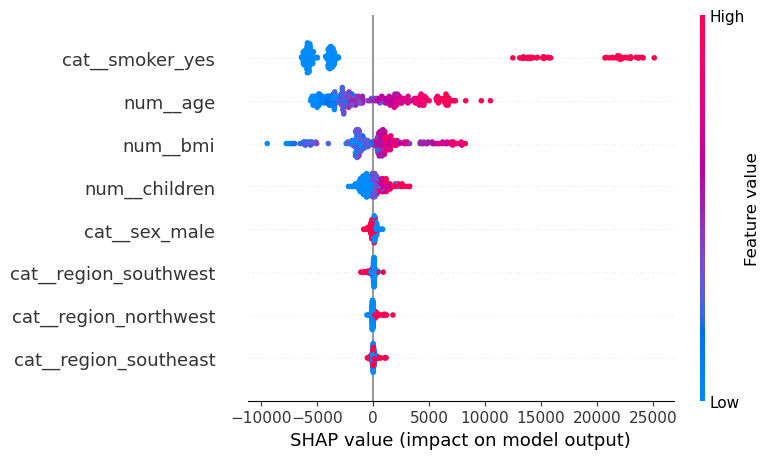


SHAP summary for: Gradient Boosting


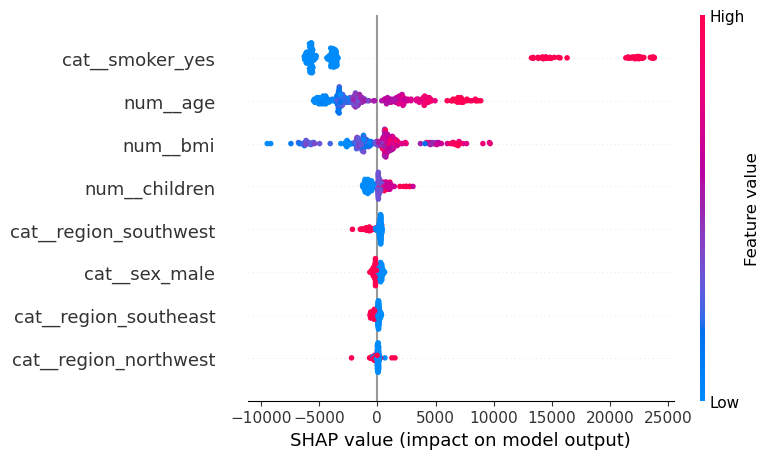


SHAP summary for: XGBoost


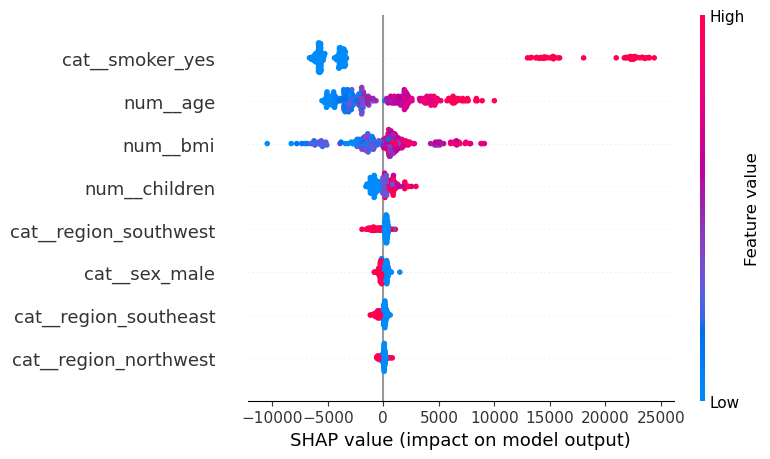


SHAP summary for: CatBoost


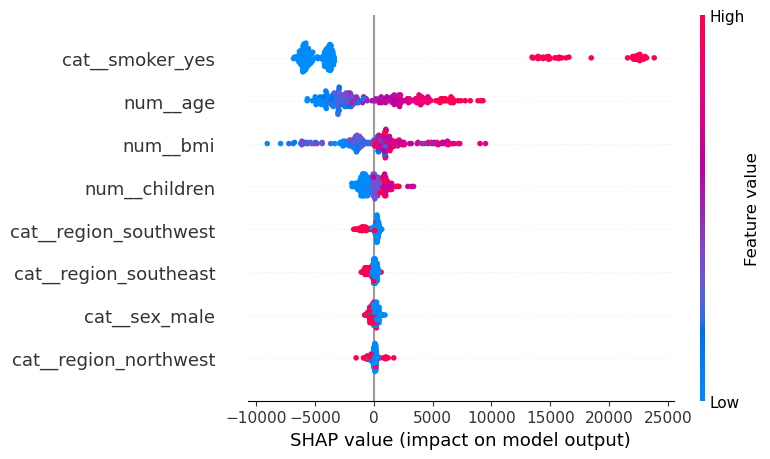

In [45]:
import shap

X_test_transformed = preprocessor.transform(X_test)

tree_models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'CatBoost']
for name in tree_models:
    if name in trained_pipelines:
        print(f"\nSHAP summary for: {name}")
        model = trained_pipelines[name].named_steps['regressor']

        # Use TreeExplainer for tree-based models
        explainer = shap.Explainer(model)
        shap_values = explainer(X_test_transformed)

        shap.summary_plot(shap_values, X_test_transformed, feature_names=preprocessor.get_feature_names_out())



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


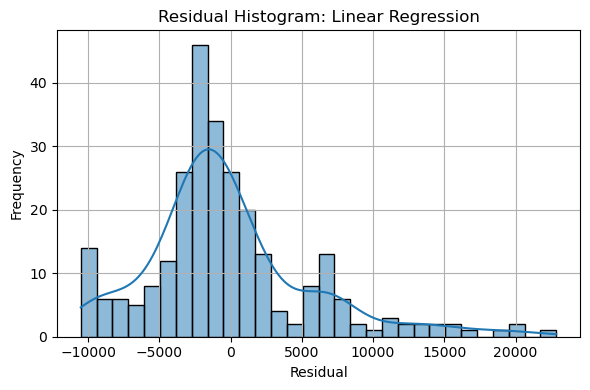

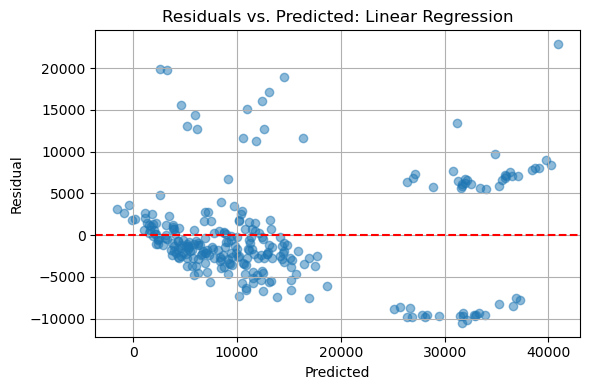

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


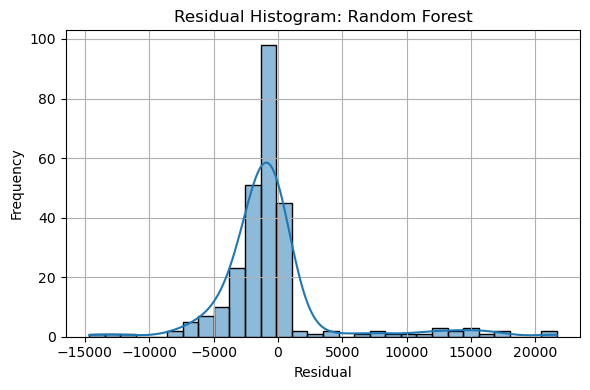

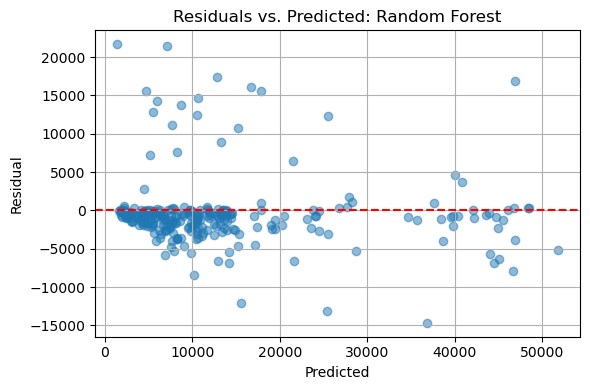

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


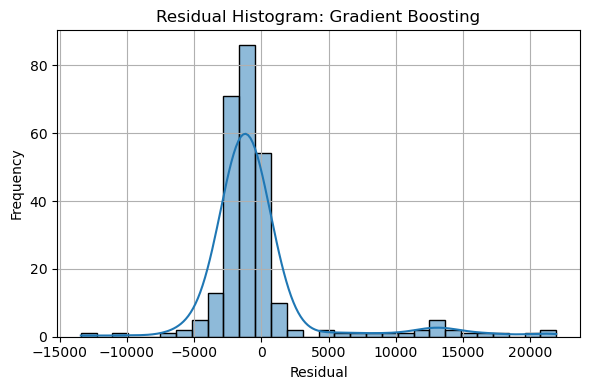

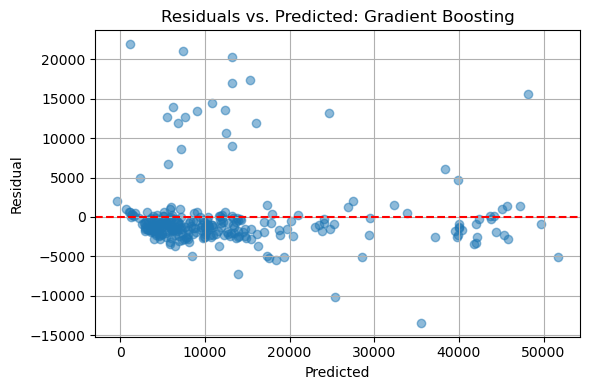

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


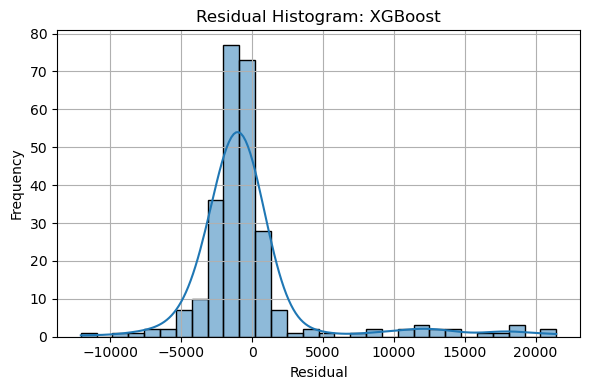

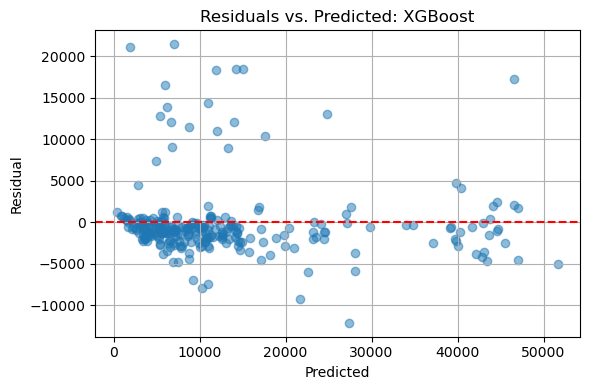

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


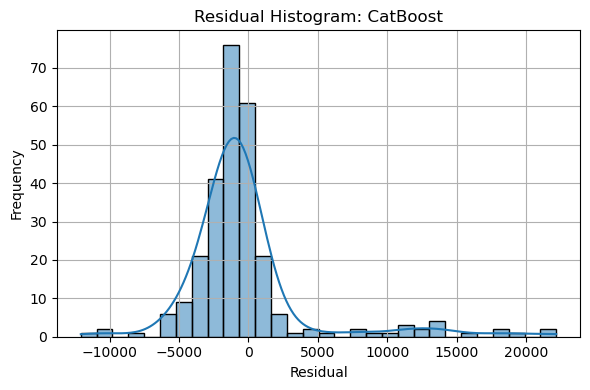

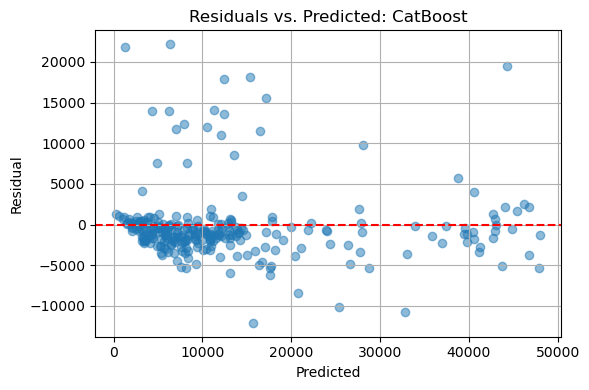

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


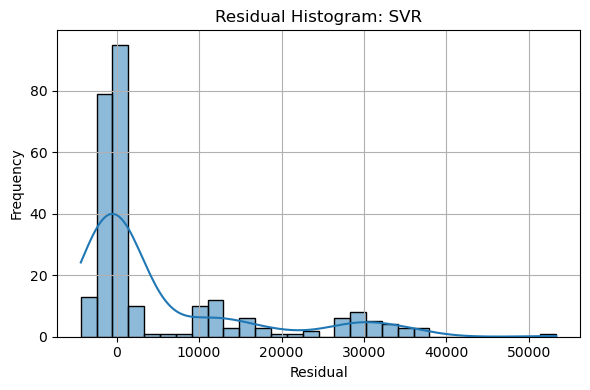

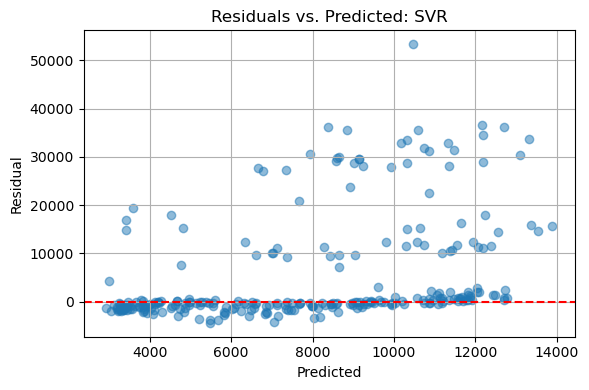

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


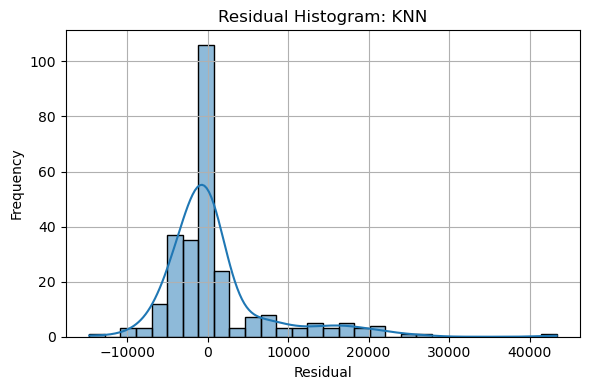

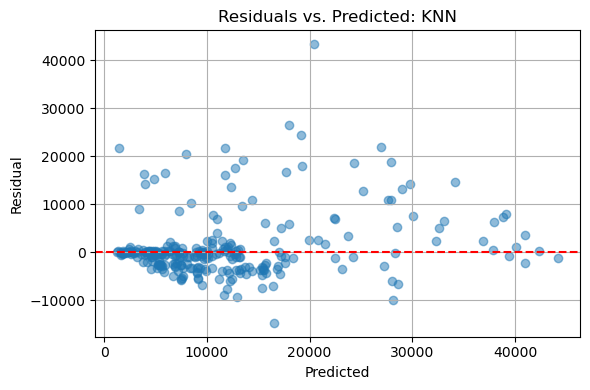

In [43]:
for name, pipeline in trained_pipelines.items():
    y_pred = pipeline.predict(X_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f'Residual Histogram: {name}')
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs. Predicted: {name}')
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [44]:
from sklearn.ensemble import StackingRegressor

# Base regressors for stacking (excluding poor ones)
stack_base_models = [
    ('rf', trained_pipelines['Random Forest'].named_steps['regressor']),
    ('gb', trained_pipelines['Gradient Boosting'].named_steps['regressor']),
    ('xgb', trained_pipelines['XGBoost'].named_steps['regressor']),
    ('cat', trained_pipelines['CatBoost'].named_steps['regressor'])
]

# Define stacker
stack_model = StackingRegressor(
    estimators=stack_base_models,
    final_estimator=LinearRegression(),
    passthrough=True
)

# Re-fit on transformed data
stack_model.fit(X_train_transformed := preprocessor.transform(X_train), y_train)

# Predict and evaluate
stack_pred = stack_model.predict(X_test_transformed)
stack_rmse = mean_squared_error(y_test, stack_pred, squared=False)
stack_r2 = r2_score(y_test, stack_pred)

print(f"Stacked Ensemble — RMSE: {stack_rmse:.2f}, R²: {stack_r2:.4f}")


Stacked Ensemble — RMSE: 4354.67, R²: 0.8779


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


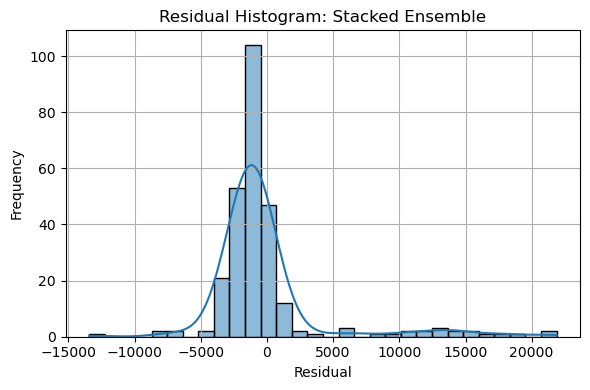

['stacked_ensemble.pkl']

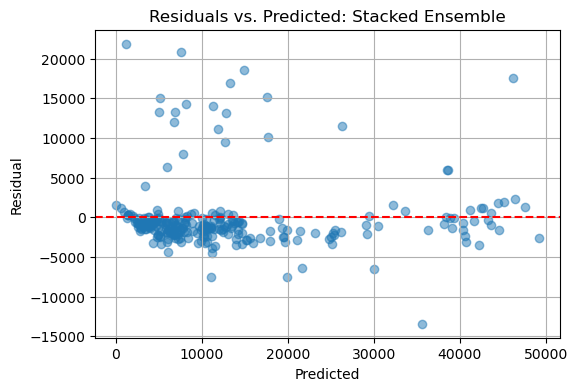

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute residuals
stack_residuals = y_test - stack_pred

# --- Residual Histogram ---
plt.figure(figsize=(6, 4))
sns.histplot(stack_residuals, bins=30, kde=True)
plt.title('Residual Histogram: Stacked Ensemble')
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Residuals vs. Predicted ---
plt.figure(figsize=(6, 4))
plt.scatter(stack_pred, stack_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted: Stacked Ensemble')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.grid(True)

from joblib import dump
dump(stack_model, 'stacked_ensemble.pkl')


Decision Tree RMSE: 4776.26
Decision Tree R²: 0.8531


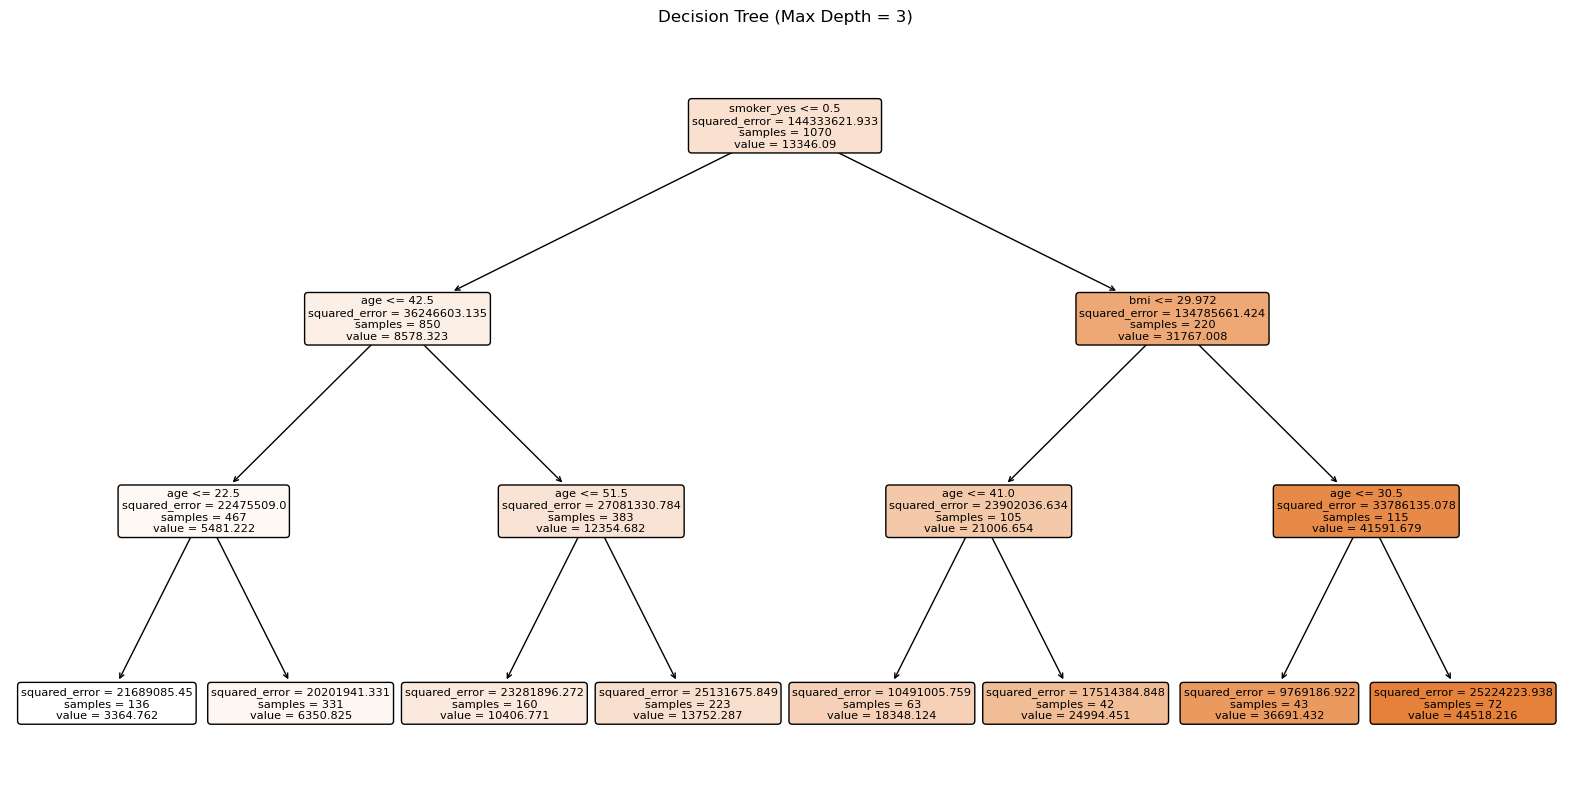

['decision_tree.pkl']

In [57]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('insurance.csv')

# One-hot encode categorical features manually
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train shallow interpretable tree
dtree = DecisionTreeRegressor(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)


# Predict on the test set
y_pred_tree = dtree.predict(X_test)

# Calculate RMSE and R²
rmse = mean_squared_error(y_test, y_pred_tree, squared=False)
r2 = r2_score(y_test, y_pred_tree)

print(f"Decision Tree RMSE: {rmse:.2f}")
print(f"Decision Tree R²: {r2:.4f}")


# Plot tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree (Max Depth = 3)")
plt.show()

from joblib import dump
dump(dtree, 'decision_tree.pkl')
